<a href="https://colab.research.google.com/github/Ikrammsr/apple-stock-analysis-project/blob/main/apple_stock_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

## About Apple Inc.

Apple Inc. is a global technology company based in Cupertino, California. It was founded in 1976 by Steve Jobs, Steve Wozniak, and Ronald Wayne. Apple is famous for its innovative products like the iPhone, iPad, Mac computers, Apple Watch, and services such as Apple Music and iCloud. The company is a leader in multiple industries, including smartphones, personal computers, and streaming services, and has a huge influence on global markets.

## About the Dataset

This dataset provides a detailed look at Apple’s historical stock performance (AAPL) in a clean, daily format. It covers the period from Apple’s IPO in 1980 up to the present, making it perfect for both financial analysis and machine learning projects.  

The dataset contains **8 columns**:

- **Date:** The trading day (YYYY-MM-DD)  
- **ticker:** The stock symbol on NASDAQ (AAPL)  
- **name:** Full company name (Apple Inc.)  
- **Open:** Stock price at the start of the day (USD)  
- **High:** Highest price during the day (USD)  
- **Low:** Lowest price during the day (USD)  
- **Close:** Stock price at market close (USD)  
- **Volume:** Number of shares traded during the day  

The data is collected via the **yfinance Python library**, which pulls information directly from Yahoo Finance.

## Project Goal

The goal of this project is to explore Apple’s stock trends, understand patterns in daily returns, and build predictive models using Python and statistical methods. Specifically, this project will let us:

- Handle and clean data efficiently using Python  
- Explore trends with visualizations and descriptive statistics  
- Test assumptions like normality and run hypothesis tests  
- Apply regression models (linear & logistic) and a Random Forest classifier  
- Understand factors that influence high-return days  

By combining programming and statistical analysis, this project will give us a deeper understanding of Apple’s stock behavior and strengthen our skills in both coding and data analysis.
## Research Question

Based on this goal, the main research question is:  
**How has Apple’s stock performance changed over time, and which factors can help predict daily stock returns?**

To answer this, we will explore trends in stock prices, daily returns, and trading volumes, test statistical assumptions like normality, compare performance across different periods, and build predictive models using linear regression, logistic regression, and Random Forest classifiers.  


## Data Loading & Cleaning

In this section, we will load the Apple stock dataset, check for missing values or duplicates, and prepare the data for analysis. This step ensures that all calculations, visualizations, and statistical tests are accurate and reliable.


In [3]:
# Import necessary libraries
import pandas as pd

# Load the CSV file
df = pd.read_csv('Apple_historical_data.csv')
df



,Date,Open,High,Low,Close,Volume,ticker,name
0,1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,AAPL,Apple Inc. (AAPL) Historical Data
1,1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,AAPL,Apple Inc. (AAPL) Historical Data
2,1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,AAPL,Apple Inc. (AAPL) Historical Data
3,1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,AAPL,Apple Inc. (AAPL) Historical Data
4,1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,AAPL,Apple Inc. (AAPL) Historical Data
...,...,...,...,...,...,...,...,...
11302,2025-10-16 00:00:00-04:00,248.250000,249.039993,245.130005,247.449997,39777000,AAPL,Apple Inc. (AAPL) Historical Data
11303,2025-10-17 00:00:00-04:00,248.020004,253.380005,247.270004,252.289993,49147000,AAPL,Apple Inc. (AAPL) Historical Data
11304,2025-10-20 00:00:00-04:00,255.889999,264.380005,255.630005,262.239990,90483000,AAPL,Apple Inc. (AAPL) Historical Data
11305,2025-10-21 00:00:00-04:00,261.880005,265.290009,261.829987,262.769989,46695900,AAPL,Apple Inc. (AAPL) Historical Data


In [4]:
#Preview the first 5 rows
df.head()

,Date,Open,High,Low,Close,Volume,ticker,name
0,1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,AAPL,Apple Inc. (AAPL) Historical Data
1,1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,AAPL,Apple Inc. (AAPL) Historical Data
2,1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,AAPL,Apple Inc. (AAPL) Historical Data
3,1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,AAPL,Apple Inc. (AAPL) Historical Data
4,1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,AAPL,Apple Inc. (AAPL) Historical Data


In [5]:
# Check data types and missing values
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11307 entries, 0 to 11306
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11307 non-null  object 
 1   Open    11307 non-null  float64
 2   High    11307 non-null  float64
 3   Low     11307 non-null  float64
 4   Close   11307 non-null  float64
 5   Volume  11307 non-null  int64  
 6   ticker  11307 non-null  object 
 7   name    11307 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 706.8+ KB


In [6]:
#Check how many missing values are in each column
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
ticker,0
name,0


In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df



,Date,Open,High,Low,Close,Volume,ticker,name
0,1980-12-12 05:00:00+00:00,0.098485,0.098913,0.098485,0.098485,469033600,AAPL,Apple Inc. (AAPL) Historical Data
1,1980-12-15 05:00:00+00:00,0.093775,0.093775,0.093347,0.093347,175884800,AAPL,Apple Inc. (AAPL) Historical Data
2,1980-12-16 05:00:00+00:00,0.086924,0.086924,0.086495,0.086495,105728000,AAPL,Apple Inc. (AAPL) Historical Data
3,1980-12-17 05:00:00+00:00,0.088636,0.089064,0.088636,0.088636,86441600,AAPL,Apple Inc. (AAPL) Historical Data
4,1980-12-18 05:00:00+00:00,0.091206,0.091634,0.091206,0.091206,73449600,AAPL,Apple Inc. (AAPL) Historical Data
...,...,...,...,...,...,...,...,...
11302,2025-10-16 04:00:00+00:00,248.250000,249.039993,245.130005,247.449997,39777000,AAPL,Apple Inc. (AAPL) Historical Data
11303,2025-10-17 04:00:00+00:00,248.020004,253.380005,247.270004,252.289993,49147000,AAPL,Apple Inc. (AAPL) Historical Data
11304,2025-10-20 04:00:00+00:00,255.889999,264.380005,255.630005,262.239990,90483000,AAPL,Apple Inc. (AAPL) Historical Data
11305,2025-10-21 04:00:00+00:00,261.880005,265.290009,261.829987,262.769989,46695900,AAPL,Apple Inc. (AAPL) Historical Data


In [8]:
# Sort by date just in case
df=df.sort_values("Date").reset_index(drop=True)
df

,Date,Open,High,Low,Close,Volume,ticker,name
0,1980-12-12 05:00:00+00:00,0.098485,0.098913,0.098485,0.098485,469033600,AAPL,Apple Inc. (AAPL) Historical Data
1,1980-12-15 05:00:00+00:00,0.093775,0.093775,0.093347,0.093347,175884800,AAPL,Apple Inc. (AAPL) Historical Data
2,1980-12-16 05:00:00+00:00,0.086924,0.086924,0.086495,0.086495,105728000,AAPL,Apple Inc. (AAPL) Historical Data
3,1980-12-17 05:00:00+00:00,0.088636,0.089064,0.088636,0.088636,86441600,AAPL,Apple Inc. (AAPL) Historical Data
4,1980-12-18 05:00:00+00:00,0.091206,0.091634,0.091206,0.091206,73449600,AAPL,Apple Inc. (AAPL) Historical Data
...,...,...,...,...,...,...,...,...
11302,2025-10-16 04:00:00+00:00,248.250000,249.039993,245.130005,247.449997,39777000,AAPL,Apple Inc. (AAPL) Historical Data
11303,2025-10-17 04:00:00+00:00,248.020004,253.380005,247.270004,252.289993,49147000,AAPL,Apple Inc. (AAPL) Historical Data
11304,2025-10-20 04:00:00+00:00,255.889999,264.380005,255.630005,262.239990,90483000,AAPL,Apple Inc. (AAPL) Historical Data
11305,2025-10-21 04:00:00+00:00,261.880005,265.290009,261.829987,262.769989,46695900,AAPL,Apple Inc. (AAPL) Historical Data


# Programming Note
We used pandas functions to load and clean the dataset efficiently. Converting the Date column allows us to perform time-based analyses and visualizations.

# Statistics Note
Checking for missing values ensures our statistical calculations (mean, standard deviation, normality tests, etc.) are not affected by incomplete data.



# Feature Engineering


After cleaning the dataset, the next step is to create new features that help us better understand Apple’s stock behavior and prepare the data for analysis and predictive modeling.

For example, the Daily Return tells us how much the stock price changed each day, which is essential for measuring volatility and trends.

Moving averages smooth out short-term fluctuations in stock prices and reveal trends over weeks or months.


Overall, feature engineering turns raw data into meaningful variables that can be analyzed statistically and used in machine learning models, directly supporting our research question: Which factors can help predict Apple’s daily stock returns?

In [9]:
import numpy as np


# -------------------------------
# Function: Daily Return
# -------------------------------
def calculate_daily_return(open_price, close_price):
    """
    Calculate daily return (%) = (Close - Open)/Open * 100
    """
    return (close_price - open_price) / open_price * 100
# Function to compute moving average (window-based)
def moving_average(series, window):
    """
    Compute moving average using a sliding window
    """
    ma = []
    for i in range(len(series)):
        if i < window - 1:
            ma.append(np.nan)  # Not enough data points for the first few days
        else:
            ma.append(np.mean(series[i - window + 1:i + 1]))
    return ma

# Apply the functions to create new columns
df['Daily_Return'] = calculate_daily_return(df['Open'], df['Close'])
df['MA_7'] = moving_average(df['Close'], 7)     # 7-day moving average
df['MA_30'] = moving_average(df['Close'], 30)   # 30-day moving average

# Display first few rows to verify new columns
df[['Date', 'Open', 'Close', 'Daily_Return', 'MA_7', 'MA_30']].head()


,Date,Open,Close,Daily_Return,MA_7,MA_30
0,1980-12-12 05:00:00+00:00,0.098485,0.098485,0.000000,NaN,NaN
1,1980-12-15 05:00:00+00:00,0.093775,0.093347,-0.456594,NaN,NaN
2,1980-12-16 05:00:00+00:00,0.086924,0.086495,-0.492577,NaN,NaN
3,1980-12-17 05:00:00+00:00,0.088636,0.088636,0.000000,NaN,NaN
4,1980-12-18 05:00:00+00:00,0.091206,0.091206,0.000000,NaN,NaN


# Programming Note

In this step, we used Python functions and loops to create new columns that make our dataset more informative.
We defined two functions — calculate_daily_return() and moving_average() — to automate the calculations for daily returns and moving averages.
This approach makes our code modular, efficient, and reusable, which is an important programming skill in data analysis.

# Statistics Note

From a statistical perspective, these new variables help us explore stock behavior and trends more deeply.

The daily return shows the percentage change in Apple’s stock each day — an important measure of performance and volatility.

The moving averages (7-day and 30-day) smooth out short-term noise and highlight longer-term trends.

# Exploratory Data Analysis (EDA)

EDA helps us visualize and understand how Apple’s stock behaves over time — its price trends, trading volume, and daily returns.

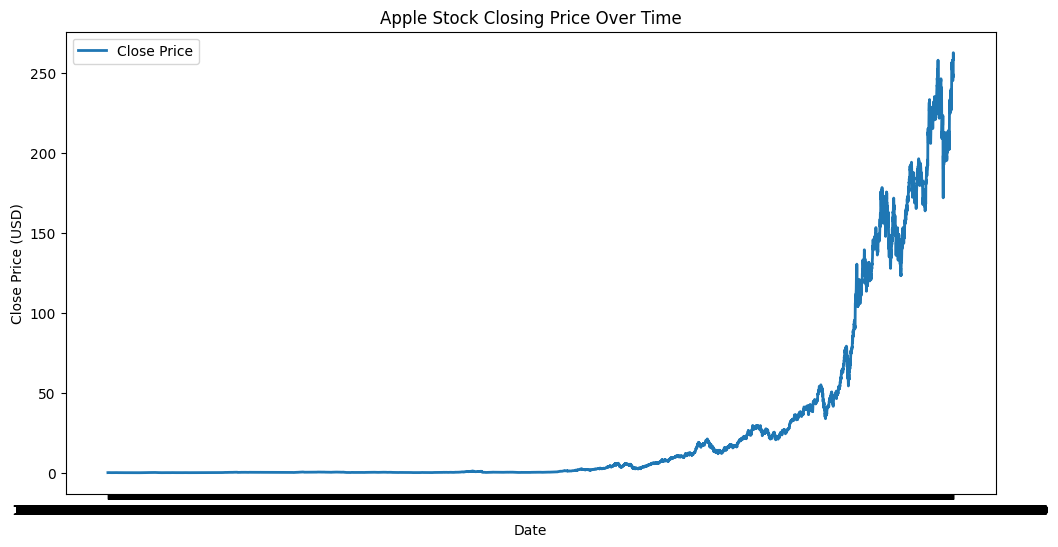

In [ ]:
#Plot the Close Price Trend Over Time
import matplotlib.pyplot as plt

# Plot the trend of the closing price over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.title("Apple Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

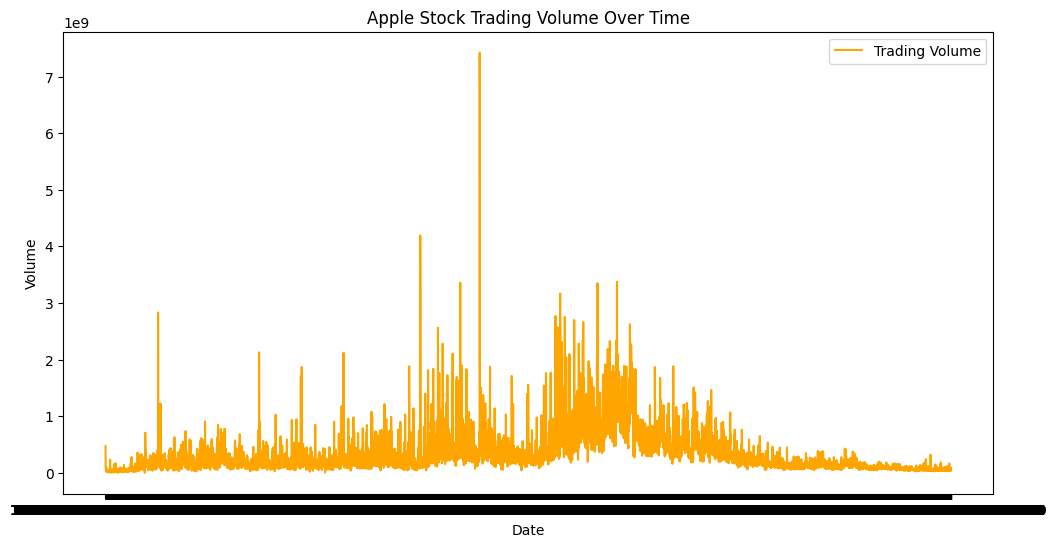

In [ ]:
#Plot the Daily Trading Volume Trend
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], color='orange', label='Trading Volume')
plt.title("Apple Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

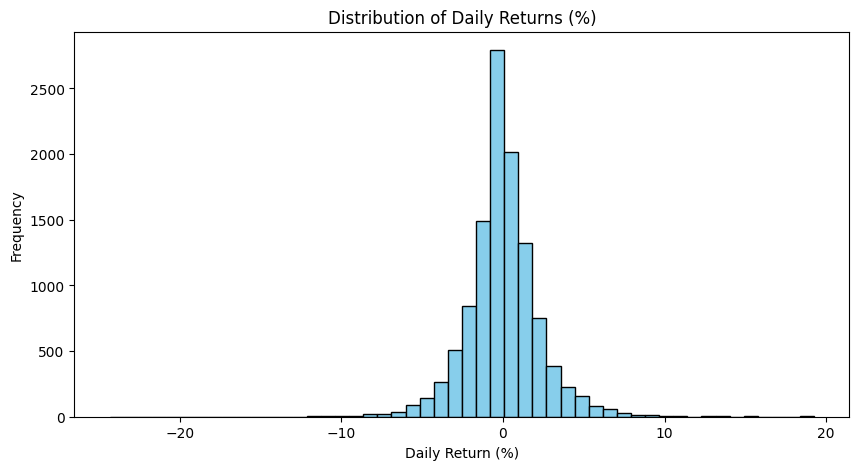

In [ ]:
#Histogram of Daily Returns
plt.figure(figsize=(10,5))
plt.hist(df['Daily_Return'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Daily Returns (%)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.show()

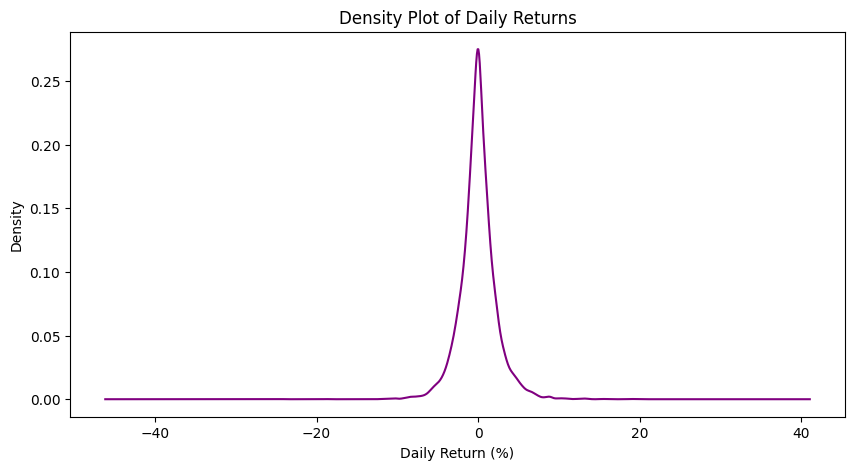

In [ ]:
#Density Plot of Daily Returns
df['Daily_Return'].plot(kind='kde', figsize=(10,5), color='purple')
plt.title("Density Plot of Daily Returns")
plt.xlabel("Daily Return (%)")
plt.show()

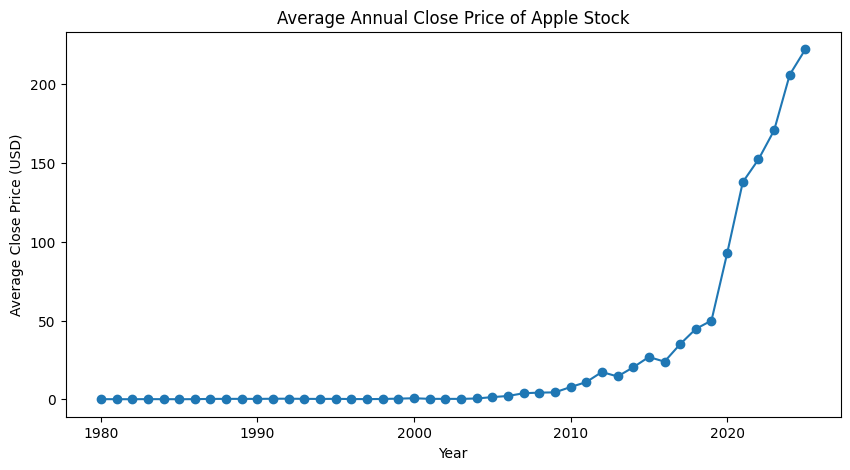

In [ ]:
# Monthly and Annual Averages
# Extract year and month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and compute average Close price
annual_avg = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10,5))
plt.plot(annual_avg.index, annual_avg.values, marker='o')
plt.title("Average Annual Close Price of Apple Stock")
plt.xlabel("Year")
plt.ylabel("Average Close Price (USD)")
plt.show()

# Programming Note

In this part, we used loops, groupby, and visualization libraries to analyze the dataset visually and statistically.
It shows our ability to use Python for data exploration, summarization, and plotting — key programming skills in data analysis.

# Statistics Note

EDA is where we start interpreting data distributions, variability, and patterns.
We visually assess:

Whether returns are normally distributed

How volume and price relate

Which time periods show more volatility or growth

This part connects to the research question by describing how Apple’s stock performance evolved before predicting or testing anything statistically.

In [12]:
#compute descriptive statistics
mean_val = df["Daily_Return"].mean()
median_val=df["Daily_Return"].median()
std_val=df["Daily_Return"].std()
min_val=df["Daily_Return"].min()
max_val=df["Daily_Return"].max()
print(f"Mean: {mean_val:.4f}")
print(f"Median: {median_val:.4f}")
print(f"Standard Deviation: {std_val:.4f}")
print(f"Minimum: {min_val:.4f}")
print(f"Maximum: {max_val:.4f}")

Mean: 0.0021
Median: 0.0000
Standard Deviation: 2.2681
Minimum: -24.3524
Maximum: 19.2656


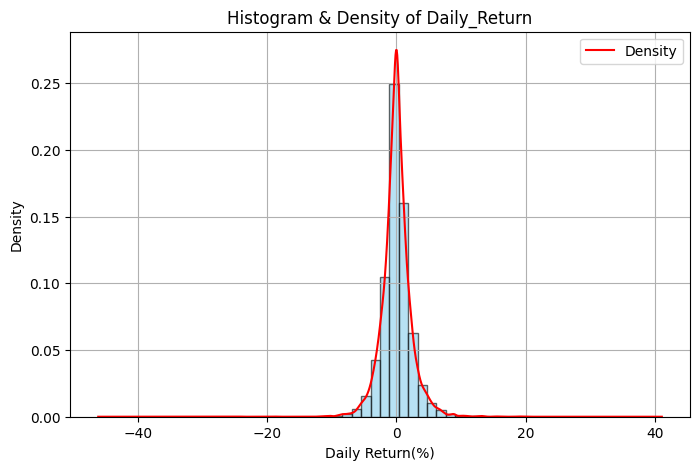

In [16]:
#Plot histogram and density
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Daily_Return"].dropna(), bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black")
df["Daily_Return"].plot(kind="kde", color="red", label="Density")
plt.title("Histogram & Density of Daily_Return")
plt.xlabel("Daily Return(%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df["Daily_Return"].dropna())
print("Shapiro-Wilk Test Result: ")
print(f"Statistic: {stat:.4f}, p-value:{p:.6f}")

Shapiro-Wilk Test Result: 
Statistic: 0.9438, p-value:0.000000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11307.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Interpretation
if p>0.05:
  print("The p-value > 0.05 -> Accept H0: Daily_Return is likely normal distributed")
else:
  print("The p-value < 0.05 -> Reject")